<a href="https://colab.research.google.com/github/ASHTYAGI2911/Python3/blob/master/Introduction_Data_Analysis_and_Data_Science_with_Python_and_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#                                                                        Introduction - Data Analysis and Data Science with Python and Pandas

                                                       **Based on Avocado Data set on Kaggle!**

[Introduction - Data Analysis and Data Science with Python and Pandas By SENTDEX](https://www.youtube.com/watch?v=nLw1RNvfElg&list=PLQVvvaa0QuDfSfqQuee6K8opKtZsh7sA9)

In [0]:
!pip --version

In [0]:
!pip install pandas matplotlib                 

In [0]:
import pandas as pd                            #Import libraries into program

In [0]:
from google.colab import files                 #in this part i am using google.colab files method to download file to google colab
uploaded = files.upload()

In [0]:
import io
df = pd.read_csv(io.StringIO(uploaded["avocado.csv"].decode("utf-8")))

In [0]:
df.head()

In [0]:
df.tail(2)

In [0]:
df["AveragePrice"]
df["AveragePrice"].head()
df.AveragePrice.head()

In [0]:
albany_df = df.copy()[df["region"] == "Albany"]
albany_df.head()

In [0]:
albany_df.index

In [0]:
albany_df.set_index("Date")

In [0]:
albany_df = albany_df.set_index("Date")
# albany_df.set_index("Date", inplace=True)

In [0]:
albany_df.head()

In [0]:
albany_df.plot()

In [0]:
albany_df["AveragePrice"].plot()

[Graphing/visualization - Data Analysis with Python and Pandas p.2](https://www.youtube.com/watch?v=DamIIzp41Jg&list=PLQVvvaa0QuDfSfqQuee6K8opKtZsh7sA9&index=2)

In [22]:
import pandas as pd
import io
from google.colab import files
load_here = files.upload()

Saving avocado.csv to avocado (1).csv


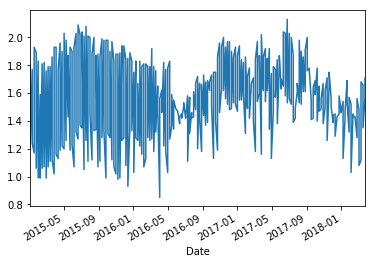

In [23]:
df = pd.read_csv(io.StringIO(load_here["avocado.csv"].decode("utf-8")))
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)
df.sort_index(inplace=True)              # This is why we already indexed Date
albany_df = df.copy()[ df["region"] == "Albany"]
albany_df["AveragePrice"].plot()

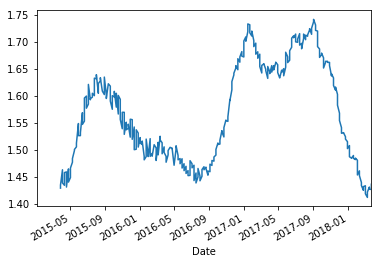

In [24]:
#albany_df.set_index("Date", inplace=True)
albany_df.sort_index(inplace=True)
# albany_df.sort_values(By="Date", ascending=True, inplace=True)

albany_df["AveragePrice"].rolling(25).mean().plot()

In [0]:
albany_df["Price25ma"] = albany_df["AveragePrice"].rolling(25).mean()

In [25]:
albany_df.head(5)

albany_df.index

DatetimeIndex(['2015-01-04', '2015-01-04', '2015-01-11', '2015-01-11',
               '2015-01-18', '2015-01-18', '2015-01-25', '2015-01-25',
               '2015-02-01', '2015-02-01',
               ...
               '2018-02-25', '2018-02-25', '2018-03-04', '2018-03-04',
               '2018-03-11', '2018-03-11', '2018-03-18', '2018-03-18',
               '2018-03-25', '2018-03-25'],
              dtype='datetime64[ns]', name='Date', length=338, freq=None)

In [0]:
albany_df.dropna(inplace=True)

In [27]:
albany_df.head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,,
2015-01-04,51,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany
2015-01-04,51,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
2015-01-11,50,1.77,1182.56,39.00,305.12,0.00,838.44,838.44,0.00,0.0,organic,2015,Albany
2015-01-11,50,1.24,41195.08,1002.85,31640.34,127.12,8424.77,8036.04,388.73,0.0,conventional,2015,Albany
2015-01-18,49,1.17,44511.28,914.14,31540.32,135.77,11921.05,11651.09,269.96,0.0,conventional,2015,Albany


In [0]:
df["region"].unique()
df.dropna(inplace=True)

In [15]:
df["region"].values

array(['Southeast', 'Chicago', 'HarrisburgScranton', ..., 'SouthCentral',
       'California', 'NewYork'], dtype=object)

In [0]:
graph_df = pd.DataFrame()
for region in df["region"].unique():
  print(region)
  region_df = df.copy()[ df["region"] == region ]
  #region_df.set_index("Date", inplace=True)
  #region_df.sort_index(inplace=True)
  region_df[f"{region}_price25mma"] = region_df["AveragePrice"].rolling(25).mean()
  
  if graph_df.empty:
    graph_df = region_df[[f"{region}_price25ma"]]
  else:
    graph_df = graph_df.join(region_df[f"{region}_price25ma"])
    

--------------------------------------------------------------------------------------------------------------------------------------

In [0]:
df = pd.read_csv(io.StringIO(load_here["avocado.csv"].decode("utf-8")))

In [0]:
df["Date"] = pd.to_datetime(df["Date"])
df.sort_values("Date", ascending=True, inplace=True)

df.columns

# Other way to scure system creashed use only one Type "'organic', 'conventional'"
df["type"].unique()
df = df.copy()[ df["type"] == "organic"]

**This Below syntax use too much RAM hance the system crashed so we used only [:16]**

In [0]:
graph_df = pd.DataFrame()

for region in df["region"].unique():
  print(region)
  
  region_df = df.copy()[df["region"] == region]
  region_df = region_df.set_index("Date")
  region_df = region_df.sort_index()
  region_df[f"{region}_price25ma"] = region_df["AveragePrice"].rolling(25).mean()
  
  if graph_df.empty:
    graph_df = region_df[[f"{region}_price25ma"]]
  else:
    graph_df = graph_df.join(region_df[f"{region}_price25ma"])
    
graph_df.tail()

In [0]:
graph_df.head(3)

In [0]:
graph_df.dropna(axis=0)      # axis=0 (Default By Row) axis=1 coulmns

In [0]:
graph_df.plot()

In [0]:
graph_df.plot(figsize=(10,7), legend=False)

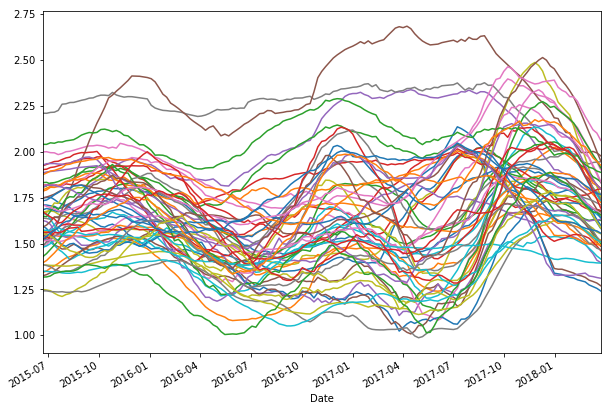

In [58]:
graph_df.dropna().plot(figsize=(10,7), legend=False)